# Cooking similarity - études et exploitation des données (1)

Ce notebook explique les différentes étapes de tris et extraction du jeu de données <font color=blue>"full_format_recipes.json"<ont>.

Il s'agit d'un jeu de données de 20 000 recettes extraites du site [Epicurious](https://www.epicurious.com/).

Ce jeu de données nous permet de travailler sur des recettes diverses avec plusieurs informations tel que les valeurs nutritionnelles, la  note de la recette, les ingrédients, catégories...

## Source
Jeu de données obtenu sur: https://www.kaggle.com/hugodarwood/epirecipes

## Contenu

Plus de 20 000 recettes listées selon l’évaluation de la recette, l’information nutritionnelle et la(les) catégorie(s) attribuée(s) etc...

In [2]:
import numpy as np
import pandas as pd 
from pandas import read_csv
from IPython.display import Image

df = pd.read_json("full_format_recipes.json")

In [5]:
df.head()

,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title
0,426.0,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",2006-09-01 04:00:00,None,"[1. Place the stock, lentils, celery, carrot, ...",7.0,"[4 cups low-sodium vegetable or chicken stock,...",30.0,2.500,559.0,"Lentil, Apple, and Turkey Wrap"
1,403.0,"[Food Processor, Onion, Pork, Bake, Bastille D...",2004-08-20 04:00:00,This uses the same ingredients found in boudin...,[Combine first 9 ingredients in heavy medium s...,23.0,"[1 1/2 cups whipping cream, 2 medium onions, c...",18.0,4.375,1439.0,Boudin Blanc Terrine with Red Onion Confit
2,165.0,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",2004-08-20 04:00:00,None,[In a large heavy saucepan cook diced fennel a...,7.0,"[1 fennel bulb (sometimes called anise), stalk...",6.0,3.750,165.0,Potato and Fennel Soup Hodge
3,NaN,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",2009-03-27 04:00:00,The Sicilian-style tomato sauce has tons of Me...,[Heat oil in heavy large skillet over medium-h...,NaN,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN,5.000,NaN,Mahi-Mahi in Tomato Olive Sauce
4,547.0,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",2004-08-20 04:00:00,None,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,"[1 12-ounce package frozen spinach soufflé, th...",20.0,3.125,452.0,Spinach Noodle Casserole


## Tris des données

Nous avons trié les données par catégories pour obtenir des jeux de données plus petits afin de les exploiter et les afficher dans notre interface web. 
Les jeux de données doivent contenir des catégories de recette pertinente tel que "Tarte", "Pâte" ou "Cookie" de sorte à montrer une certaine diversité dans les ingrédients, les directions...

Voici le détail de notre analyse afin de générer les différents jeu de données:

***
Trier les recettes par catégories:

In [6]:
#Nombre de résultats par catégorie
def getNumbersOfRecipeByCategories(df):
    result = {}
    
    for categoriesList in df.categories:
        
        # check if it is really a list of categories
        if not isinstance(categoriesList, list):
            # if not, skip
            continue
            
        for categorie in categoriesList:
            if categorie in result:
                result[categorie] += 1
            else:
                result[categorie] = 1
    return result

In [7]:
getNumbersOfRecipeByCategories(df)

{'Sandwich': 428,
 'Bean': 577,
 'Fruit': 1958,
 'Tomato': 2140,
 'turkey': 456,
 'Vegetable': 2087,
 'Kid-Friendly': 1791,
 'Apple': 666,
 'Lentil': 98,
 'Lettuce': 225,
 'Cookie': 69,
 'Food Processor': 973,
 'Onion': 2238,
 'Pork': 928,
 'Bake': 4413,
 'Bastille Day': 30,
 "New Year's Eve": 165,
 'Dried Fruit': 206,
 'Port': 110,
 'Winter': 3099,
 'Chill': 1126,
 'Bon Appétit': 9355,
 'Soup/Stew': 1164,
 'Dairy': 1496,
 'Potato': 1128,
 'Fennel': 371,
 'Gourmet': 6648,
 'New York': 49,
 'Fish': 936,
 'Olive': 556,
 'Sauté': 2044,
 'Low Fat': 929,
 'Low Cal': 1049,
 'High Fiber': 1013,
 'Dinner': 2705,
 'Healthy': 2351,
 'Simmer': 890,
 'Pescatarian': 6042,
 'Dairy Free': 3206,
 'Peanut Free': 8390,
 'Tree Nut Free': 7044,
 'Soy Free': 8088,
 'Kosher': 6175,
 'Cheese': 1355,
 'Pasta': 968,
 'Side': 3151,
 'Vegetarian': 6846,
 'Quick & Easy': 5372,
 'Fall': 3015,
 'California': 146,
 'Basil': 565,
 'Bacon': 587,
 'Summer': 4151,
 'Salad': 1516,
 'Easter': 234,
 'Ham': 222,
 'Asparagus

La liste ci-dessus nous donne le nombre de recettes par catégories dans le désordre. On peut voir des catégories qui sont moins pertinentes tel que des ingrédients comme "Onion","Tomato"... ou qui possède très peu de résultats (<200).
***
Pour obtenir la catégorie contenant le plus de recettes:

In [8]:
import operator
recipeCategCount = getNumbersOfRecipeByCategories(df)
max(recipeCategCount, key=recipeCategCount.get)

'Bon Appétit'

On remarque que la catégorie possédant le plus de recette est "Bon Appétit". Cette catégorie n'est pas pertinente car elle peut rassembler plusieurs recettes différentes qui n'ont aucune similarité comme on peut le voir sur le site d'Epicurious en allant dans cette catégorie:



Le but est donc de trouver des recettes qui ont des bases similaires mais qui présentent aussi des variantes.


***
Trier les catégories par ordre décroissant de nombre de recettes:

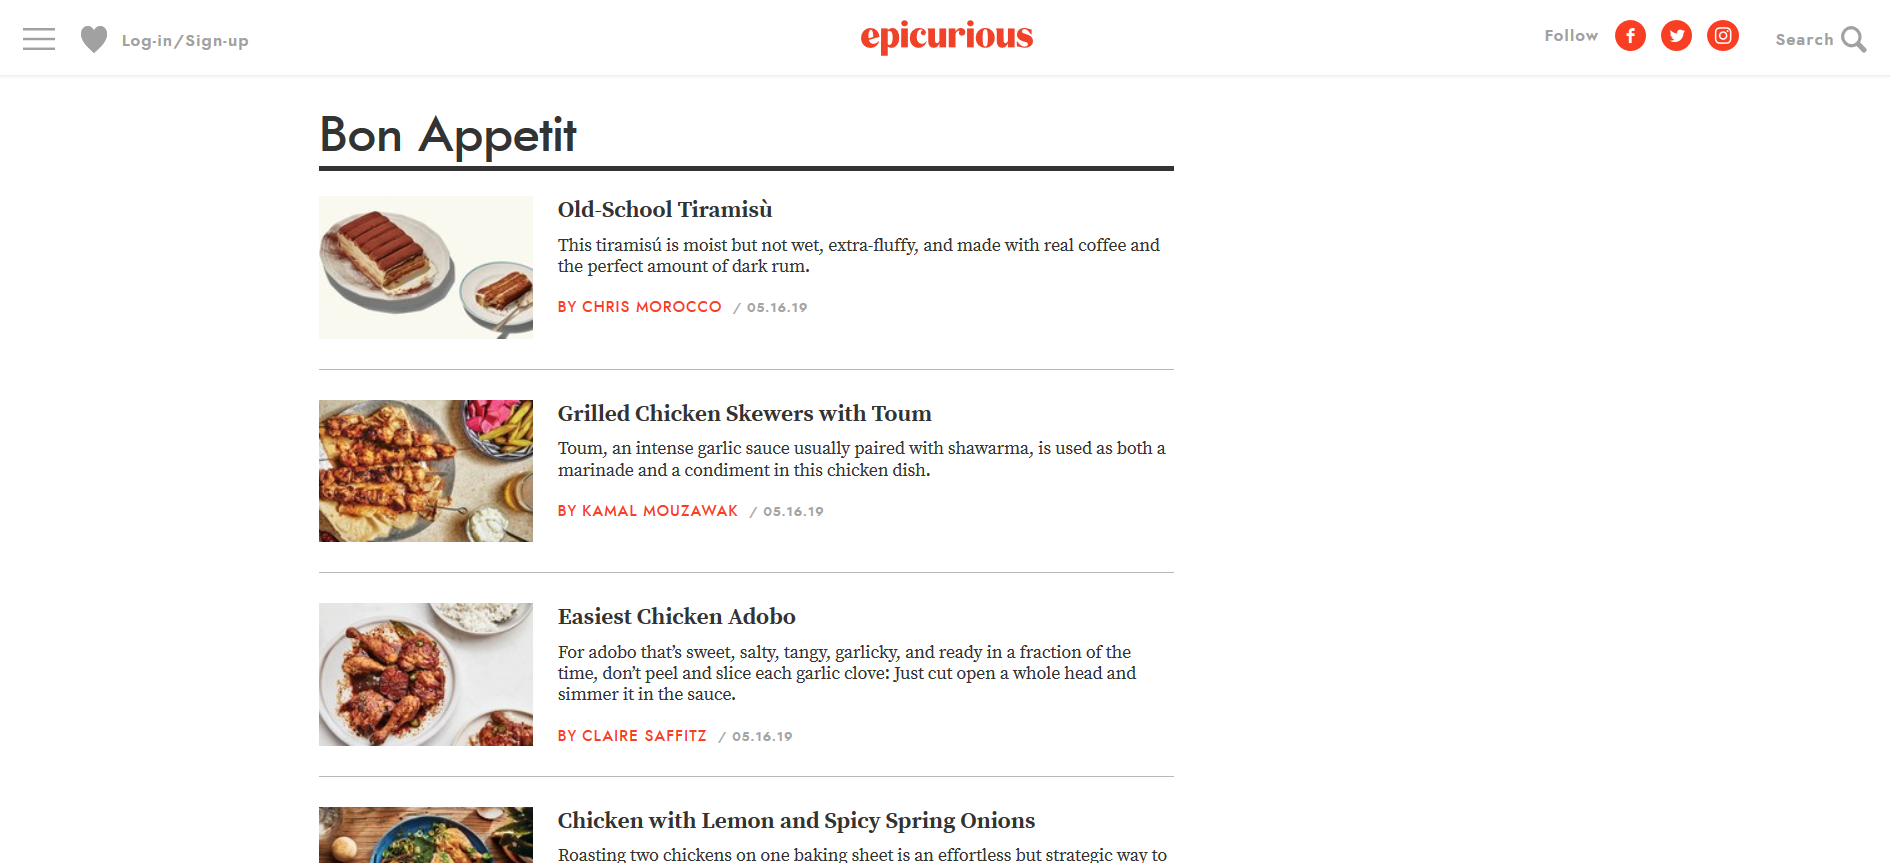

In [3]:
Image(filename="images/categorie_bonappetit.png")

In [10]:
#sorted_recipeCategCount = sorted(recipeCategCount.items(), key=operator.itemgetter(1))
sorted_recipeCategCount = sorted(recipeCategCount.items(), key=operator.itemgetter(1), reverse=True)
sorted_recipeCategCount

[('Bon Appétit', 9355),
 ('Peanut Free', 8390),
 ('Soy Free', 8088),
 ('Tree Nut Free', 7044),
 ('Vegetarian', 6846),
 ('Gourmet', 6648),
 ('Kosher', 6175),
 ('Pescatarian', 6042),
 ('Quick & Easy', 5372),
 ('Wheat/Gluten-Free', 4906),
 ('Bake', 4413),
 ('Summer', 4151),
 ('Dessert', 3573),
 ('Dairy Free', 3206),
 ('Side', 3151),
 ('No Sugar Added', 3132),
 ('Winter', 3099),
 ('Fall', 3015),
 ('Dinner', 2705),
 ('Sugar Conscious', 2466),
 ('Healthy', 2351),
 ('Kidney Friendly', 2313),
 ('Onion', 2238),
 ('Tomato', 2140),
 ('Vegetable', 2087),
 ('Sauté', 2044),
 ('Milk/Cream', 1995),
 ('Fruit', 1958),
 ('Vegan', 1851),
 ('Kid-Friendly', 1791),
 ('Egg', 1768),
 ('Spring', 1715),
 ('Herb', 1681),
 ('Garlic', 1643),
 ('Salad', 1516),
 ('Dairy', 1496),
 ('Thanksgiving', 1458),
 ('Appetizer', 1372),
 ('Lunch', 1359),
 ('Cheese', 1355),
 ('Chicken', 1344),
 ('Roast', 1320),
 ('No-Cook', 1251),
 ('Soup/Stew', 1164),
 ('Cocktail Party', 1154),
 ('Ginger', 1146),
 ('Potato', 1128),
 ('Chill', 11

En regardant la liste des catégories triées on peut ainsi dégager des catégories interessantes tel que:
1. ('Pasta', 968) avec 968 recettes de pâtes.
2. ('Sandwich', 428) avec 428 recettes de sandwich.
3. ('Cookies', 273) avec 273 recettes de cookies.
Nous allons donc ensuite générer les jeu de données en json pour ces 3 catégories:
***
Génération des fichier json:

In [11]:
def keepCategorie(df, categorie):
    # There is probably a better way to do this...
    rowToDelete = []
    for row, categories in enumerate(df.categories):
        if not isinstance(categories, list):
            rowToDelete.append(row)
        elif not categorie in categories:
                rowToDelete.append(row)

    df = df.drop(rowToDelete)
    return df

### Génération du fichier "Pasta.json".

In [34]:
# On veut garder seulement les pasta
df_pasta = keepCategorie(df,'Pasta')

# Avec le reset_index(drop=True) on reinitialise les index à partir de 0.
df_pasta.reset_index(drop=True).to_json('Pasta.json',orient='records')
pd.read_json("Pasta.json")
#head_pasta = pd.read_json("Pasta.json")
#head_pasta.head()

,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title
0,547.0,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",2004-08-20 04:00:00,None,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,"[1 12-ounce package frozen spinach soufflé, th...",20.0,3.125,452.0,Spinach Noodle Casserole
1,NaN,"[Milk/Cream, Cheese, Leafy Green, Pasta, Bake,...",2009-11-02 04:00:00,None,[Heat oil in heavy large skillet over medium h...,NaN,"[3 tablespoons extra-virgin olive oil, 8 ounce...",NaN,3.750,NaN,Pancetta and Taleggio Lasagna with Treviso
2,NaN,"[Cheese, Herb, Pasta, Low Cal, Dinner, Lunch, ...",2013-11-13 04:00:00,"""Creamy squash and cheese crisps only make you...",[Heat oven to 375°. On a parchment paper-lined...,NaN,"[6 tablespoons shredded Parmesan, 8 ounces she...",NaN,5.000,NaN,Fontina Mac with Squash and Sage
3,634.0,"[Fish, Leafy Green, Pasta, Tomato, Bake, Quick...",2005-10-01 04:00:00,"Kristi Parnell of San Marcos, California, writ...",[Preheat oven to 425°F. Whisk 2 tablespoons oi...,31.0,"[4 tablespoons extra-virgin olive oil, divided...",44.0,4.375,181.0,"Baked Halibut with Orzo, Spinach, and Cherry T..."
4,684.0,"[Cheese, Dairy, Garlic, Herb, Pasta, Vegetable...",2004-08-20 04:00:00,None,[Preheat oven to 450°F. and oil 2 large shallo...,42.0,"[3 pounds butternut squash, quartered, seeded,...",21.0,4.375,637.0,"Roasted Butternut Squash, Rosemary, and Garlic..."
5,209.0,"[Garlic, Olive, Pasta, Side, Quick & Easy, Gou...",2008-05-12 19:57:03,Small pasta like acini di pepe and orzo make w...,[Cook acini di pepe in a pasta pot of boiling ...,8.0,"[1/2 pound acini di pepe or orzo (1 1/4 cups),...",5.0,4.375,77.0,Acini di Pepe Pasta with Garlic and Olives
6,NaN,"[Pasta, Tomato, Bake, Cod, Bell Pepper, Chard,...",2004-08-20 04:00:00,None,[Preheat the oven to 350°F. Spread the tomato ...,NaN,"[2 cups Spicy Tomato Sauce, 3 tablespoons unsa...",NaN,2.500,NaN,Cod Cannelloni with Swiss Chard and Roasted Pe...
7,724.0,"[Ginger, Herb, Nut, Pasta, Soy, Sauté, Vegetar...",2007-05-30 17:42:36,This simple vegetarian pasta is perfect for a ...,[Heat peanut oil in small skillet over medium ...,28.0,"[1 tablespoon peanut oil, 2 tablespoons minced...",21.0,4.375,1130.0,Spicy Sesame Noodles with Chopped Peanuts and ...
8,NaN,"[Olive, Pasta, Tomato, Vegetarian, Quick & Eas...",2004-08-20 04:00:00,"Gnocchi al Pomodoro, Basilico, ed Olive","[In a large, deep skillet, heat the butter ove...",NaN,"[2 tablespoons unsalted butter, 1/2 cup pitted...",NaN,4.375,NaN,"Gnocchi with Tomato, Basil, and Olives"
9,NaN,"[Onion, Pasta, Sauté, Low Fat, Quick & Easy, R...",2005-08-17 16:41:31,None,"[Toss shrimp with 1 tbsp oil, rosemary, parsle...",NaN,"[3/4 lb large shrimp (about 30 pieces), peeled...",NaN,3.125,NaN,Potato Gnocchi with Shrimp and Peas


### Génération du fichier "Sandwich.json"

In [33]:
# On veut garder seulement les sandwich
df_sw = keepCategorie(df,'Sandwich')
df_sw.reset_index(drop=True).to_json('Sandwich.json',orient='records')
pd.read_json("Sandwich.json")
#head_sw = pd.read_json("Sandwich.json")
#head_sw.head()

,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title
0,426.0,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",2006-09-01 04:00:00.000,None,"[1. Place the stock, lentils, celery, carrot, ...",7.0,"[4 cups low-sodium vegetable or chicken stock,...",30.0,2.500,559.0,"Lentil, Apple, and Turkey Wrap"
1,948.0,"[Sandwich, Food Processor, Tomato, Kid-Friendl...",2004-08-20 04:00:00.000,This recipe can be prepared in 45 minutes or l...,"[Mix basil, mayonnaise and butter in processor...",79.0,[2 1/2 cups (lightly packed) fresh basil leave...,19.0,4.375,1042.0,The Best Blts
2,904.0,"[Sandwich, Beef, Cheese, Mushroom, Mustard, Qu...",2004-08-20 04:00:00.000,None,[Mix cheese and green onions in medium bowl. G...,70.0,"[1 cup shredded mozzarella cheese, 1/4 cup fin...",38.0,4.375,1413.0,Veal Burgers Stuffed with Mozzarella Cheese
3,641.0,"[Sandwich, Beef, Cheese, Leafy Green, Onion, Q...",2004-08-20 04:00:00.000,None,[Mash first 3 ingredients in small bowl until ...,37.0,"[1 cup crumbled Stilton cheese, 2 tablespoons ...",39.0,4.375,907.0,Grilled Roast Beef and Stilton Sandwich
4,959.0,"[30 Days of Groceries, Chickpea, Salad, Sandwi...",2016-04-21 18:04:13.025,This recipe is part of our Spring Grocery Bag ...,"[Whisk mayonnaise, oil, lemon zest, and lemon ...",60.0,"[3 tablespoons mayonnaise, 2 tablespoons extra...",21.0,3.750,1541.0,Chickpea Salad Sandwich With Creamy Carrot-Rad...
5,352.0,"[Salad, Sandwich, Vegetarian, Kid-Friendly, Qu...",2004-08-20 04:00:00.000,"This looks and tastes like egg salad, even tho...","[Finely mash tofu with a fork in a bowl, then ...",31.0,"[1 (14-oz) package firm tofu, rinsed and drain...",16.0,3.125,488.0,Creamy Tofu Salad
6,374.0,"[Sandwich, Bean, Egg, Kid-Friendly, Quick & Ea...",2013-05-09 04:00:00.000,"""As a kid, I loved frenched green beans drench...","[Whisk 1/2 cup crumbled feta, 3 tablespoons fr...",19.0,"[1/2 cup crumbled feta, 3 tablespoons fresh le...",16.0,0.000,590.0,Egg Sandwich with Green Bean Slaw
7,245.0,"[Sandwich, Beef, Dinner, Lunch, Meat, Ground B...",2014-09-16 04:00:00.000,None,[Heat 2 tablespoons vegetable oil in a medium ...,15.0,"[3 tablespoons vegetable oil, 2 thinly sliced ...",17.0,4.375,405.0,The BA Patty Melt
8,NaN,"[Sandwich, No-Cook, Kid-Friendly, Back to Scho...",2009-04-20 04:00:00.000,Peanut butter goes well with more than just ja...,[Lay the bread slices on a work surface. Sprea...,NaN,"[2 slices whole-wheat bread or Banana Bread, 1...",NaN,3.750,NaN,Peanut Butter Berry–Wich
9,NaN,"[Sandwich, Garlic, Onion, turkey, Summer, Gril...",2004-08-20 04:00:00.000,None,"[In a large bowl stir together scallion, garli...",NaN,"[1 cup chopped scallion (about 1 bunch), 3 lar...",NaN,4.375,NaN,Grilled Turkey Burgers


### Génération du fichier "Cookie.json"

In [32]:
# On veut garder seulement les cookies
df_cookie = keepCategorie(df,'Cookies')
df_cookie.reset_index(drop=True).to_json('Cookies.json',orient='records')
pd.read_json("Cookies.json")

,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title
0,129.0,"[Cookies, Rum, Cheese, Dairy, Fruit, Dessert, ...",2004-08-20 12:48:48.000,"To bake these puffs all at once, you will need...",[Cut butter into 1/4-inch slices. In a large b...,9.0,"[4 sticks (2 cups) cold unsalted butter, 4 cup...",1.0,4.375,34.0,Banana Rum Puffs
1,105.0,"[Cookies, Food Processor, Fruit, Dessert, Bake...",2004-08-20 04:00:00.000,These cookies are perfect with a cup of tea.,[Combine first 3 ingredients in processor; ble...,7.0,"[1 cup all purpose flour, 4 ounces chilled cre...",1.0,3.125,31.0,Cream Cheese Strudel Cookies
2,87.0,"[Cookies, Dessert, Bake, Christmas, Kid-Friend...",2011-12-22 04:00:00.000,"When it comes right down to it, the simplest h...","[Beat together butter, sugar, and salt in a la...",4.0,"[2 sticks (1 cup) unsalted butter, softened, 1...",1.0,3.750,26.0,Buttery Sugar Cookies
3,92.0,"[Cookies, Nut, Dessert, Bake, Christmas, Kid-F...",2013-11-06 04:00:00.000,Hand off this dough to the kids—or anyone with...,[Place racks in lower and upper thirds of oven...,6.0,"[1 1/2 cups all-purpose flour, 1 1/2 cups unsa...",1.0,4.375,51.0,Roasted-Almond Thumbprints
4,76.0,"[Bon Appétit, Bake, Cookies, Almond, Lemon, De...",2016-07-01 18:35:00.000,These traditional almond cookies hail from Tus...,[Preheat oven to 350°F. Toast almonds on a rim...,5.0,"[1 1/4 cups slivered almonds, 1 teaspoon finel...",2.0,0.000,15.0,Tuscan Almond Cookies (Ricciarelli)
5,305.0,"[Cookies, Cheese, Dairy, Fruit, Nut, Dessert, ...",2004-08-20 12:48:48.000,None,[In a food processor blend butter and cream ch...,17.0,"[2 sticks (1 cup) unsalted butter, softened, 8...",4.0,4.375,127.0,Date Walnut Rugelach
6,123.0,"[Cookies, Passover, Kosher for Passover, Almon...",2016-04-06 14:05:00.631,Both cardamom and pistachios are essential ing...,"[Using an electric mixer on medium speed, crea...",8.0,"[1 cup sugar, 1/3 cup virgin coconut oil, soft...",2.0,5.000,19.0,"Flourless Almond Cookies With Cardamom, Orange..."
7,300.0,"[Cookies, Mixer, Dessert, Freeze/Chill, Christ...",2006-11-07 20:58:36.000,You can freeze the dough flavored or unflavore...,"[1. In the bowl of a mixer, combine butter, su...",16.0,"[1 1/2 cups (3 sticks) unsalted butter, at roo...",3.0,4.375,216.0,Butter Shortbread Cookies
8,13.0,"[Cookies, Mixer, Dessert, Bake, Freeze/Chill, ...",2006-11-08 20:44:59.000,Editor's note: This recipe is from Ming Tsai's...,[1. Preheat the oven to 325°F. In a small bowl...,0.0,"[2 teaspoons ground ginger, 2 teaspoons ground...",0.0,4.375,1.0,Five-Spice Shortbread
9,223.0,"[Cookies, Food Processor, Mixer, Dairy, Nut, D...",2006-11-08 21:07:18.000,Editor's note: This recipe is from Ming Tsai's...,[1. Preheat the oven to 325°F. Grease a baking...,19.0,"[1 cup sugar, 1 cup heavy cream, 1 pound macad...",2.0,1.250,4.0,Caramel Macadamia Nut Crunch


Afin de tester avec le minimum de données (et pas un fichier json de plus de 200 à 900 résultats...)nous avons créé un fichier "Test" avec quelques données:

In [31]:
#Générer json avec 5 recettes
head_cookie = pd.read_json("Cookies.json")
head_cookie.head()
head_cookie.to_json('Cookies_small.json',orient='records')
data_small = pd.read_json("Cookies_small.json")
data_small

,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title
0,129.0,"[Cookies, Rum, Cheese, Dairy, Fruit, Dessert, ...",2004-08-20 12:48:48.000,"To bake these puffs all at once, you will need...",[Cut butter into 1/4-inch slices. In a large b...,9.0,"[4 sticks (2 cups) cold unsalted butter, 4 cup...",1.0,4.375,34.0,Banana Rum Puffs
1,105.0,"[Cookies, Food Processor, Fruit, Dessert, Bake...",2004-08-20 04:00:00.000,These cookies are perfect with a cup of tea.,[Combine first 3 ingredients in processor; ble...,7.0,"[1 cup all purpose flour, 4 ounces chilled cre...",1.0,3.125,31.0,Cream Cheese Strudel Cookies
2,87.0,"[Cookies, Dessert, Bake, Christmas, Kid-Friend...",2011-12-22 04:00:00.000,"When it comes right down to it, the simplest h...","[Beat together butter, sugar, and salt in a la...",4.0,"[2 sticks (1 cup) unsalted butter, softened, 1...",1.0,3.750,26.0,Buttery Sugar Cookies
3,92.0,"[Cookies, Nut, Dessert, Bake, Christmas, Kid-F...",2013-11-06 04:00:00.000,Hand off this dough to the kids—or anyone with...,[Place racks in lower and upper thirds of oven...,6.0,"[1 1/2 cups all-purpose flour, 1 1/2 cups unsa...",1.0,4.375,51.0,Roasted-Almond Thumbprints
4,76.0,"[Bon Appétit, Bake, Cookies, Almond, Lemon, De...",2016-07-01 18:35:00.000,These traditional almond cookies hail from Tus...,[Preheat oven to 350°F. Toast almonds on a rim...,5.0,"[1 1/4 cups slivered almonds, 1 teaspoon finel...",2.0,0.000,15.0,Tuscan Almond Cookies (Ricciarelli)
5,305.0,"[Cookies, Cheese, Dairy, Fruit, Nut, Dessert, ...",2004-08-20 12:48:48.000,None,[In a food processor blend butter and cream ch...,17.0,"[2 sticks (1 cup) unsalted butter, softened, 8...",4.0,4.375,127.0,Date Walnut Rugelach
6,123.0,"[Cookies, Passover, Kosher for Passover, Almon...",2016-04-06 14:05:00.631,Both cardamom and pistachios are essential ing...,"[Using an electric mixer on medium speed, crea...",8.0,"[1 cup sugar, 1/3 cup virgin coconut oil, soft...",2.0,5.000,19.0,"Flourless Almond Cookies With Cardamom, Orange..."
7,300.0,"[Cookies, Mixer, Dessert, Freeze/Chill, Christ...",2006-11-07 20:58:36.000,You can freeze the dough flavored or unflavore...,"[1. In the bowl of a mixer, combine butter, su...",16.0,"[1 1/2 cups (3 sticks) unsalted butter, at roo...",3.0,4.375,216.0,Butter Shortbread Cookies
8,13.0,"[Cookies, Mixer, Dessert, Bake, Freeze/Chill, ...",2006-11-08 20:44:59.000,Editor's note: This recipe is from Ming Tsai's...,[1. Preheat the oven to 325°F. In a small bowl...,0.0,"[2 teaspoons ground ginger, 2 teaspoons ground...",0.0,4.375,1.0,Five-Spice Shortbread
9,223.0,"[Cookies, Food Processor, Mixer, Dairy, Nut, D...",2006-11-08 21:07:18.000,Editor's note: This recipe is from Ming Tsai's...,[1. Preheat the oven to 325°F. Grease a baking...,19.0,"[1 cup sugar, 1 cup heavy cream, 1 pound macad...",2.0,1.250,4.0,Caramel Macadamia Nut Crunch


### Remarque:

En regardant les résultats des fichier générés on remarque que les intitulés des recettes correspondent.

Par exemple si on prend cette ligne de "Cookies.json":
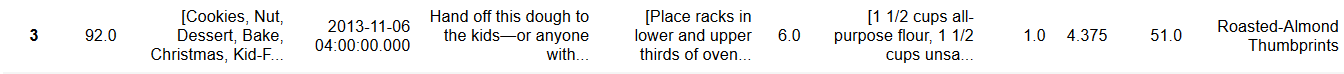

et qu'on vérifie sur le site d'épicurious:



Notre prochain travail serait donc ensuite de séparer les quantités et les ingrédients de la colonne "ingredients" afin de pouvoir exploité ces données numériques et les afficher dans des graphiques.
